In [25]:
import numpy as np
import pandas as pd
import json
import requests
import folium
data_jong = pd.read_csv('./data/세종시 세대별 갭투자 현황.csv')
data_jong

,도로명주소,지번주소,위도,경도,매매,전세,갭
0,세종특별자치시 한누리대로 311,세종특별자치시 나성동 732,36.492071,127.255837,98000000,120000000,-22000000
1,세종특별자치시 한누리대로 311,세종특별자치시 나성동 732,36.492071,127.255837,90000000,110000000,-20000000
2,세종특별자치시 한누리대로 291,세종특별자치시 나성동 737,36.490209,127.256034,120000000,135000000,-15000000
3,세종특별자치시 한누리대로 287,세종특별자치시 나성동 738,36.489796,127.256156,95000000,125000000,-30000000
4,세종특별자치시 한누리대로 587,세종특별자치시 도담동 656,36.515620,127.258448,150000000,110000000,40000000
...,...,...,...,...,...,...,...
82,세종특별자치시 도움3로 160,세종특별자치시 종촌동 640,36.508175,127.242950,715000000,370000000,345000000
83,세종특별자치시 달빛로 165,세종특별자치시 아름동 1279,36.512922,127.248392,830000000,400000000,430000000
84,세종특별자치시 남세종로 301,세종특별자치시 소담동 32-42,36.481331,127.304435,920000000,400000000,520000000
85,세종특별자치시 보람로 95,세종특별자치시 도담동 632,36.516336,127.261412,930000000,370000000,560000000


In [26]:
data_seoul = pd.read_csv('./data/서울시 세대별 갭투자 현황.csv')
data_seoul

,도로명주소,지번주소,위도,경도,매매,전세,갭
0,서울특별시 강남구 학동로73길 13,서울특별시 강남구 청담동 34-13,37.519219,127.047328,230000000,210000000,20000000
1,서울특별시 강남구 테헤란로 428,서울특별시 강남구 대치동 891-9,37.505692,127.054183,318000000,270000000,48000000
2,서울특별시 강남구 언주로30길 21,서울특별시 강남구 도곡동 467-7,37.488866,127.052015,1760000000,1300000000,460000000
3,서울특별시 강남구 학동로68길 29,서울특별시 강남구 삼성동 16-5,37.516560,127.047188,1190000000,600000000,590000000
4,서울특별시 강남구 광평로47길 17,서울특별시 강남구 수서동 736,37.487909,127.098186,870000000,260000000,610000000
...,...,...,...,...,...,...,...
208,서울특별시 용산구 이촌로81길 14,서울특별시 용산구 이촌동 402,37.519649,126.976817,1810000000,1060000000,750000000
209,서울특별시 용산구 이촌로 201,서울특별시 용산구 이촌동 404,37.521348,126.970156,2000000000,1200000000,800000000
210,서울특별시 용산구 이촌로88길 15,서울특별시 용산구 이촌동 300-11,37.517255,126.978273,1970000000,420000000,1550000000
211,서울특별시 금천구 디지털로12길 15,서울특별시 금천구 가산동 140-36,37.478169,126.889840,114400000,114400000,0


In [27]:
map_jong2 = folium.Map(location=['36.5', '127.3'], zoom_start='11')
for a in data_jong.index:
    
    latitude = data_jong.loc[a,"위도"]
    longtitude = data_jong.loc[a,"경도"]
    tooltip = data_jong.loc[a,'갭']
    color = 'pink'
    icon = 'home'
    folium.Marker([latitude, longtitude], popup = data_jong.loc[0,'갭'],icon=folium.Icon(icon = icon, color = color),tooltip = tooltip).add_to(map_jong2)   

map_jong2
map_jong2.save('세종 갭투자 simple ver.html')

In [28]:
# 서울시 인구밀도 : 23,246km²
# 세종시 인구밀도 : 312

In [8]:
map_seoul = folium.Map(location=['37.485187', '126.980022'], zoom_start='11')
for a in data_seoul.index:
    
    latitude = data_seoul.loc[a,"위도"]
    longtitude = data_seoul.loc[a,"경도"]
    tooltip = data_seoul.loc[0,'도로명주소']
    color = 'cadetblue'
    icon = 'home'
    folium.Marker([latitude, longtitude], popup = data_seoul.loc[0,'갭'],icon=folium.Icon(icon = icon, color = color),tooltip = tooltip).add_to(map_seoul)   

map_seoul

In [5]:
data_seoul.describe()

,위도,경도,매매,전세,갭
count,213.000000,213.000000,2.130000e+02,2.130000e+02,2.130000e+02
mean,37.541310,127.008465,1.062018e+09,5.954528e+08,4.665656e+08
std,0.054996,0.091299,8.404199e+08,4.208060e+08,5.862779e+08
min,37.452213,126.808065,1.100000e+08,2.600000e+07,-2.300000e+07
25%,37.497615,126.944037,5.900000e+08,3.300000e+08,1.680000e+08
50%,37.521716,127.024096,8.750000e+08,5.000000e+08,3.500000e+08
75%,37.574245,127.075096,1.380000e+09,7.500000e+08,6.120000e+08
max,37.681260,127.159671,7.760000e+09,3.350000e+09,7.260000e+09


In [10]:
from folium import plugins
m = folium.plugins.DualMap(location = (37.485187, 126.980022), tiles = None, zoom_start = 11)
folium.TileLayer('OpenStreetMap').add_to(m.m1)
folium.TileLayer('CartoDBPositron').add_to(m.m2)
folium.LayerControl(collapsed=False).add_to(m)
m

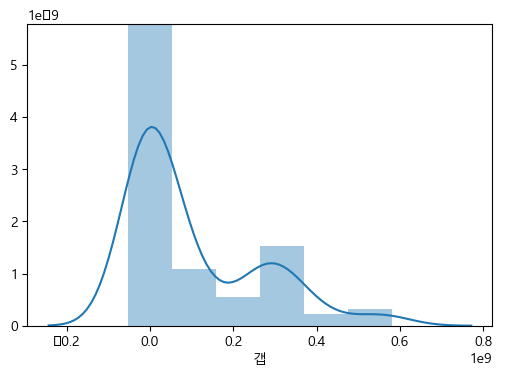

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.distplot(data_jong['갭'])

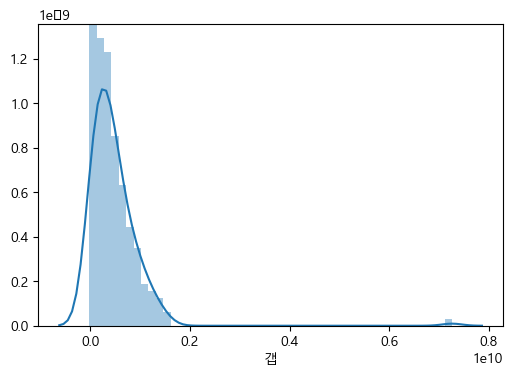

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.distplot(data_seoul['갭'])

In [13]:
data_seoul.describe()

,위도,경도,매매,전세,갭
count,213.000000,213.000000,2.130000e+02,2.130000e+02,2.130000e+02
mean,37.541310,127.008465,1.062018e+09,5.954528e+08,4.665656e+08
std,0.054996,0.091299,8.404199e+08,4.208060e+08,5.862779e+08
min,37.452213,126.808065,1.100000e+08,2.600000e+07,-2.300000e+07
25%,37.497615,126.944037,5.900000e+08,3.300000e+08,1.680000e+08
50%,37.521716,127.024096,8.750000e+08,5.000000e+08,3.500000e+08
75%,37.574245,127.075096,1.380000e+09,7.500000e+08,6.120000e+08
max,37.681260,127.159671,7.760000e+09,3.350000e+09,7.260000e+09


In [14]:
data_jong.head()

,도로명주소,지번주소,위도,경도,매매,전세,갭
0,세종특별자치시 한누리대로 311,세종특별자치시 나성동 732,36.492071,127.255837,98000000,120000000,-22000000
1,세종특별자치시 한누리대로 311,세종특별자치시 나성동 732,36.492071,127.255837,90000000,110000000,-20000000
2,세종특별자치시 한누리대로 291,세종특별자치시 나성동 737,36.490209,127.256034,120000000,135000000,-15000000
3,세종특별자치시 한누리대로 287,세종특별자치시 나성동 738,36.489796,127.256156,95000000,125000000,-30000000
4,세종특별자치시 한누리대로 587,세종특별자치시 도담동 656,36.515620,127.258448,150000000,110000000,40000000


In [22]:
state_geo = './data/33.세종시_지적도.geojson'
state_geo2 = json.load(open(state_geo, encoding = 'utf-8'))

In [ ]:
from folium import plugins
# 지도를 불러들이기
map_jong = folium.Map(location=['36.5', '127.3'], zoom_start='11')
regional_count = data_jong[['위도', '경도']]

# 지도에 색 적용 및 데이터 연결
choropleth = folium.Choropleth(
    geo_data = state_geo2,
    name = 'Gap Investment',
    data =data_jong,
    columns = ('도로명주소','갭'),
    fill_color = 'RdYlGn',
    fill_opacity = 0.7,
    line_opacity = 0.5,
    lengend_name = 'Gap index'
).add_to(map_jong)

#지도 전체화면 추가 코드
plugins.Fullscreen(position = 'topright',
                  title = "Click to Expand",
                  title_cancel = "Click to Exit",
                  force_separate_button = True).add_to(map_jong)


plugins.MousePosition().add_to(map_jong)
plugins.MarkerCluster(regional_count).add_to(map_jong)
map_jong.save('세종 갭투자.html')
map_jong